In [ ]:
pip install scikit-learn matplotlib

Obtenemos el dataset


Text(0.5, 1.0, 'Dataset generado para k-means')

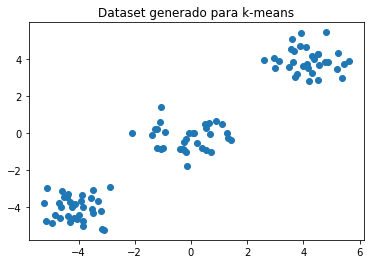

In [1]:
import sklearn
from matplotlib import pyplot as plt
from sklearn import datasets

random_state = 100



n_samples = 100

centers = [[-4, -4], [0, 0], [4, 4]]
X_kmeans, y_kmeans = datasets.make_blobs(n_samples=n_samples, centers=centers, cluster_std=0.7, random_state=random_state)

plt.scatter(X_kmeans[:, 0], X_kmeans[:, 1])
plt.title("Dataset generado para k-means")

Usamos el dataset para ajustar usando kmeans

Text(0.5, 1.0, 'Número correcto de clústeres')

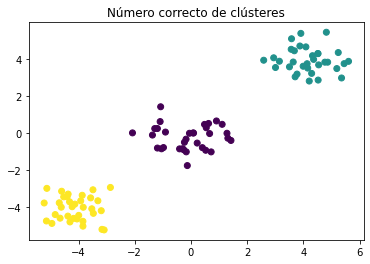

In [2]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=random_state)
y_pred_kmeans = kmeans.fit_predict(X_kmeans)

plt.figure()
plt.scatter(X_kmeans[:, 0], X_kmeans[:, 1], c=y_pred_kmeans)
plt.title("Número correcto de clústeres")

Imaginemos que los clusters tiene otra forma diferente a la circular


Text(0.5, 1.0, 'k-means con forma de luna mal clusterizados')

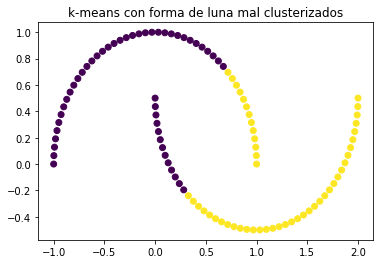

In [3]:
X_moon, y_moon = datasets.make_moons(n_samples=n_samples, random_state=random_state)
kmeans_moon = KMeans(n_clusters=2, random_state=random_state)
y_pred_moon_kmeans = kmeans_moon.fit_predict(X_moon)
plt.figure()
plt.scatter(X_moon[:, 0], X_moon[:, 1], c=y_pred_moon_kmeans)
plt.title("k-means con forma de luna mal clusterizados")

Usaremos ahora el algoritmo DBSCAN para clusterizar este dataset

Text(0.5, 1.0, 'DBSCAN con forma de luna bien clusterizados')

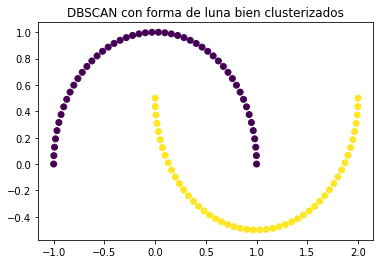

In [4]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN()
y_pred_moon_dbscan = dbscan.fit_predict(X_moon)
plt.figure()
plt.scatter(X_moon[:, 0], X_moon[:, 1], c=y_pred_moon_dbscan)
plt.title("DBSCAN con forma de luna bien clusterizados")

Text(0.5, 1.0, 'DBSCAN con forma de luna con ruido')

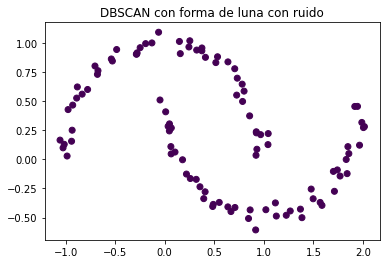

In [5]:
X_moon_noisy, y_moon_noisy = datasets.make_moons(n_samples=n_samples, random_state=random_state, noise=0.05)
y_pred_moon_dbscan_noisy = dbscan.fit_predict(X_moon_noisy)
plt.figure()
plt.scatter(X_moon_noisy[:, 0], X_moon_noisy[:, 1], c=y_pred_moon_dbscan_noisy)
plt.title("DBSCAN con forma de luna con ruido")


Una posibilidad es utilizar un valor de epsilon pequeño para detectar un mayor número de clústeres

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1]


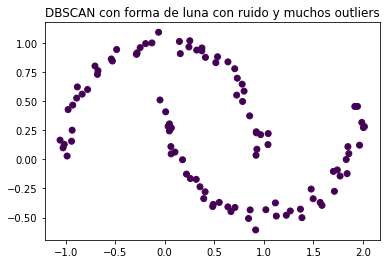

In [6]:
dbscan2 = DBSCAN(eps=0.05)
y_pred_moon_dbscan_noisy2 = dbscan2.fit_predict(X_moon_noisy)
plt.figure()
plt.scatter(X_moon_noisy[:, 0], X_moon_noisy[:, 1], c=y_pred_moon_dbscan_noisy2)
plt.title("DBSCAN con forma de luna con ruido y muchos outliers")
print(y_pred_moon_dbscan_noisy2)


Epsilon usado 0.4
[0 1 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 1 1 1
 1 1 1 1 1 1 0 1 1 0 1 1 0 0 0 0 0 0 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 0 0 0 1
 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 1 1 0 0 1 1 1 0 0]


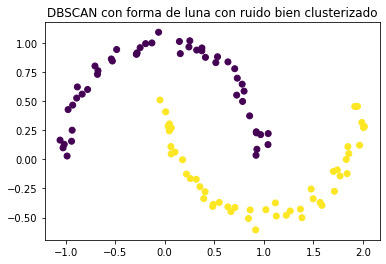

In [7]:
import numpy as np
value = 0.5
epsilon = 0.5
anomalies_values = n_samples * 0.05 # Vamos a tolerar un 5% de valores anómalos del total
while(True):
  value = value - 0.05
  if value < 0.05:
    break
  dbscan_it = DBSCAN(eps=value)
  y_pred_moon_dbscan_noisy_it = dbscan_it.fit_predict(X_moon_noisy)
  labels = np.unique(y_pred_moon_dbscan_noisy_it)
  labels_list = y_pred_moon_dbscan_noisy_it.tolist()
  
  if len(labels) > 1 and labels_list.count(-1) <= anomalies_values:
    print("Epsilon usado", value)
    epsilon = value
    break

dbscan_final = DBSCAN(eps=epsilon)
y_pred_moon_dbscan_noisy_final = dbscan_final.fit_predict(X_moon_noisy)
plt.figure()
plt.scatter(X_moon_noisy[:, 0], X_moon_noisy[:, 1], c=y_pred_moon_dbscan_noisy_final)
plt.title("DBSCAN con forma de luna con ruido bien clusterizado")
print(y_pred_moon_dbscan_noisy_final)
